# Gradient Boosting

Gradient boosting is a method that goes through cycles to iteratively add models into an ensemble.

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.

These predictions are used to calculate a loss function (like mean squared error, for instance).

Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)

Finally, we add the new model to ensemble, and ...

... repeat!

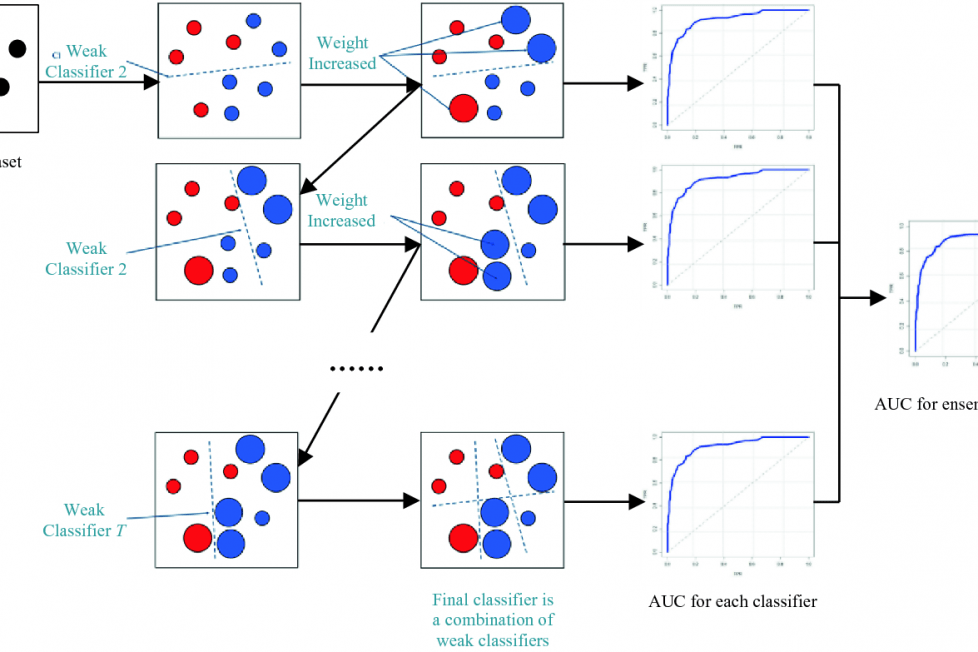

In [23]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\gb.png')

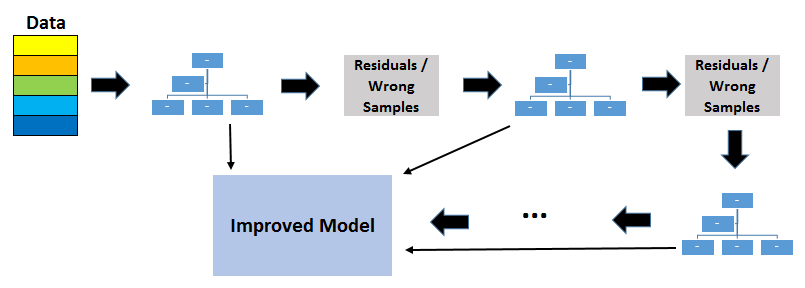

In [24]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\gb1.png')

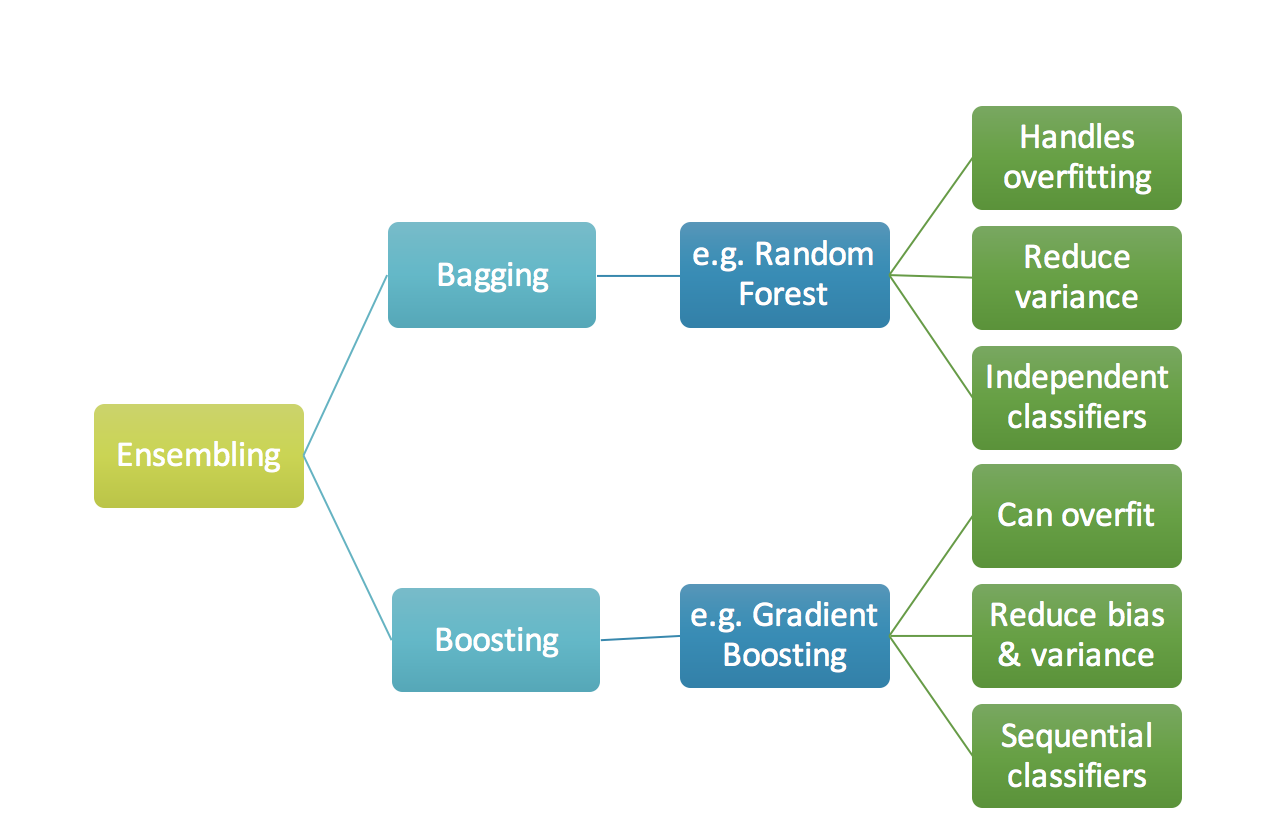

In [25]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\gb2.png')

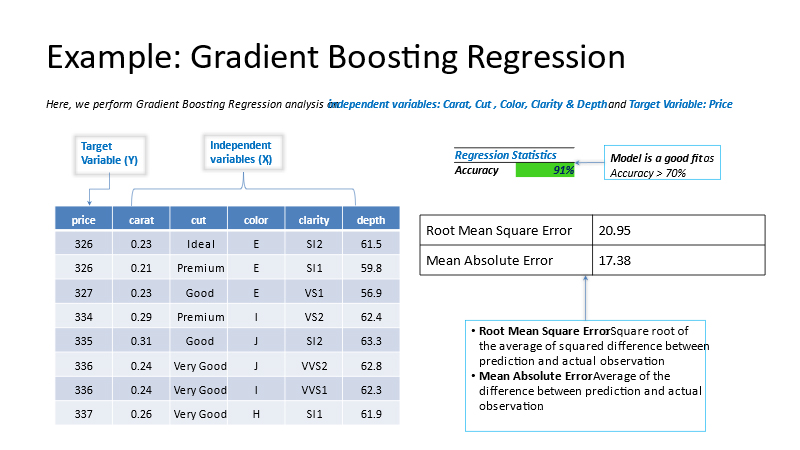

In [27]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\gb3.jpg')

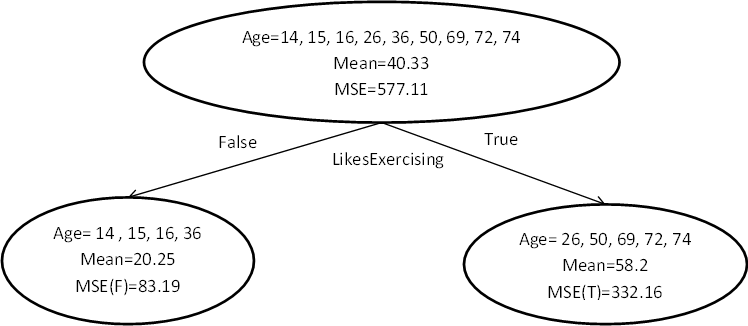

In [29]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\gb4.png')

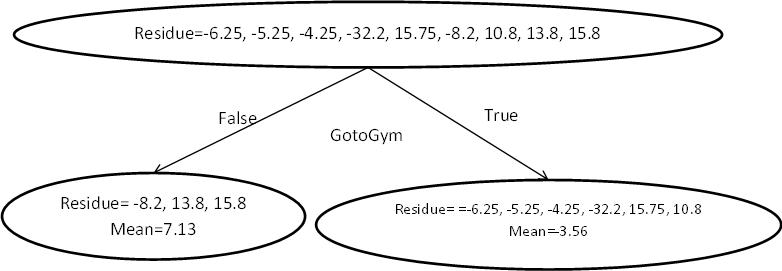

In [30]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\gb5.png')

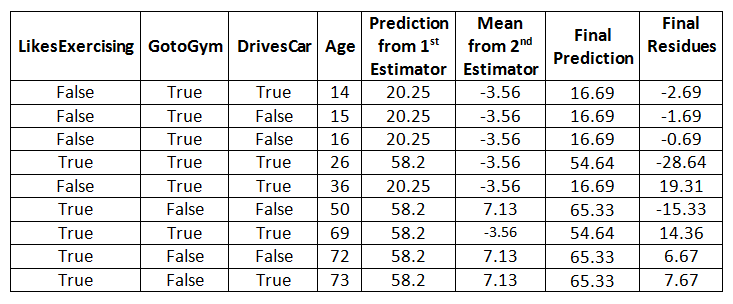

In [31]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\gb6.png')

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
train = pd.read_csv(r"C:\Users\uttam.grade\Downloads\train (1).csv")
test = pd.read_csv(r"C:\Users\uttam.grade\Downloads\test.csv")

In [31]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
# set "PassengerId" variable as index
train.set_index("PassengerId", inplace=True)
test.set_index("PassengerId", inplace=True)

In [35]:
y_train = train["Survived"]

In [36]:
# delete column "Survived" from train set
train.drop(labels="Survived", axis=1, inplace=True)

In [37]:
train.shape, test.shape

((891, 10), (418, 10))

In [38]:
# join train and test sets to form a new train_test set
train_test =  train.append(test)

In [39]:
# delete columns that are not used as features for training and prediction
columns_to_drop = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
train_test.drop(labels=columns_to_drop, axis=1, inplace=True)

In [40]:
train_test

,Pclass,Sex,Fare
PassengerId,,,
1,3,male,7.2500
2,1,female,71.2833
3,3,female,7.9250
4,1,female,53.1000
5,3,male,8.0500
...,...,...,...
1305,3,male,8.0500
1306,1,female,108.9000
1307,3,male,7.2500


In [41]:
# convert objects to numbers by pandas.get_dummies
train_test_dummies = pd.get_dummies(train_test, columns=["Sex"])

In [42]:
# check the dimension
train_test_dummies.shape

(1309, 4)

In [43]:
train_test_dummies

,Pclass,Fare,Sex_female,Sex_male
PassengerId,,,,
1,3,7.2500,0,1
2,1,71.2833,1,0
3,3,7.9250,1,0
4,1,53.1000,1,0
5,3,8.0500,0,1
...,...,...,...,...
1305,3,8.0500,0,1
1306,1,108.9000,1,0
1307,3,7.2500,0,1


In [44]:
# replace nulls with 0.0
train_test_dummies.fillna(value=0.0, inplace=True)

In [45]:
# generate feature sets (X)
X_train = train_test_dummies.values[0:891]
X_test = train_test_dummies.values[891:]

In [46]:
X_train.shape, X_test.shape

((891, 4), (418, 4))

In [47]:
X_test_scale

array([[1.        , 0.01528158, 0.        , 1.        ],
       [1.        , 0.01366309, 1.        , 0.        ],
       [0.5       , 0.01890874, 0.        , 1.        ],
       ...,
       [1.        , 0.01415106, 0.        , 1.        ],
       [1.        , 0.01571255, 0.        , 1.        ],
       [1.        , 0.0436405 , 0.        , 1.        ]])

In [48]:
# transform data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [49]:
# split training feature and target sets into training and validation subsets
from sklearn.model_selection import train_test_split

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)

In [51]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [52]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1] # Step
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.789
Accuracy score (validation): 0.780

Learning rate:  0.1
Accuracy score (training): 0.792
Accuracy score (validation): 0.780

Learning rate:  0.25
Accuracy score (training): 0.816
Accuracy score (validation): 0.803

Learning rate:  0.5
Accuracy score (training): 0.826
Accuracy score (validation): 0.834

Learning rate:  0.75
Accuracy score (training): 0.831
Accuracy score (validation): 0.789

Learning rate:  1
Accuracy score (training): 0.831
Accuracy score (validation): 0.789



In [67]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_sub, y_train_sub)
predictions = gb.predict(X_validation_sub)

print("Confusion Matrix:")
print(confusion_matrix(y_validation_sub, predictions))
print()
print("Classification Report")
print(classification_report(y_validation_sub, predictions))

Confusion Matrix:
[[131   8]
 [ 29  55]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       139
           1       0.87      0.65      0.75        84

    accuracy                           0.83       223
   macro avg       0.85      0.80      0.81       223
weighted avg       0.84      0.83      0.83       223



In [22]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gb.decision_function(X_validation_sub)
fpr_gb, tpr_gb, _ = roc_curve(y_validation_sub, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.88


In [64]:
gb

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

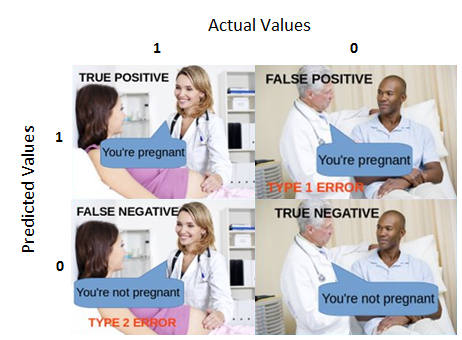

In [65]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\cm3.png')